# Evolent Health: Beer Data Analysis

**Leng Yang**

**Last Updated: 2/3/25**

## Assignment

Project Source: https://platform.stratascratch.com/data-projects/beer-data-analysis

In this assignment you will work with a beer data set. Please provide an answer to the questions below. Answer as many questions as possible:

1. Rank the top 3 breweries which produce the strongest beers.
2. Which year did beers enjoy the highest ratings?
3. Based on the users' ratings, which factors are important among taste, aroma, appearance, and palette?
4. If you were to recommend 3 beers to your friends based on this data, which ones would you recommend?
5. Which beer style seems to be the favourite based on the reviews written by users? How does written reviews compare to overall review score for the beer style?

## Data Description

The provided compressed file `BeerDataScienceProject.tar.bz2` contains data about beers and their reviews. It has the following columns:

* `beer_ABV` - alcohol by volume
* `beer_beerId` - beer ID
* `beer_brewerId` - beer brewer ID
* `beer_name` - beer name
* `beer_style` - beer style
* `review_appearance` - review on the beer's appearance
* `review_palette` - review on the beer's palette (colours)
* `review_overall` - overall beer review
* `review_taste` - review on the beer's taste
* `review_profileName` - profile name of the reviewer
* `review_aroma` - review on the beer's aroma
* `review_text` - the full text of the review
* `review_time` - timestamp when the review was made

<BR><BR>

### Data Exploration

In [5]:
#Load in necessary libraries
import pandas as pd
import numpy as np

In [159]:
#Load in dataset into Pandas
df = pd.read_csv("./datasets/BeerDataScienceProject.tar.bz2", compression="bz2")

#Convert review_time's Epoch time to an understandable datetime format
df.review_time = pd.to_datetime(df.review_time, unit='s')

#Look at dataset information for missing values and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528870 entries, 0 to 528869
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   beer_ABV            508590 non-null  float64       
 1   beer_beerId         528870 non-null  int64         
 2   beer_brewerId       528870 non-null  int64         
 3   beer_name           528870 non-null  object        
 4   beer_style          528870 non-null  object        
 5   review_appearance   528870 non-null  float64       
 6   review_palette      528870 non-null  float64       
 7   review_overall      528870 non-null  float64       
 8   review_taste        528870 non-null  float64       
 9   review_profileName  528755 non-null  object        
 10  review_aroma        528870 non-null  float64       
 11  review_text         528751 non-null  object        
 12  review_time         528870 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64

In [161]:
#Drop records containing missing values, which accounts for < 4% of all records
df.dropna(inplace=True)

In [163]:
#Count the number of duplicate reviews by user and beer
dupe_reviews = df.duplicated(subset=['beer_beerId','review_profileName']).sum()
print(f'There are {dupe_reviews} duplicate reviews.')

#Drop duplicate reviews, keeping only the most recent review
df.sort_values(by='review_time', ignore_index=True, inplace=True)
df.drop_duplicates(subset=['beer_beerId','review_profileName'], keep='last', inplace=True)
dupe_reviews = df.duplicated(subset=['beer_beerId','review_profileName']).sum()
print(f'There are {dupe_reviews} duplicate reviews after dropping duplicates.')

There are 4658 duplicate reviews.
There are 0 duplicate reviews after dropping duplicates.


In [165]:
#Looking at the distributions, it is noticed that there are ratings of 0
df.describe()

,beer_ABV,beer_beerId,beer_brewerId,review_appearance,review_palette,review_overall,review_taste,review_aroma,review_time
count,503700.000000,503700.000000,503700.000000,503700.000000,503700.000000,503700.000000,503700.000000,503700.000000,503700
mean,7.018102,21863.592043,2536.459138,3.871974,3.767944,3.839211,3.774108,3.826070,2008-11-11 17:21:50.332676352
min,0.010000,5.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1998-01-10 00:00:01
25%,5.300000,1692.000000,132.000000,3.500000,3.500000,3.500000,3.500000,3.500000,2007-04-26 02:24:35.750000128
50%,6.500000,13896.000000,392.000000,4.000000,4.000000,4.000000,4.000000,4.000000,2009-05-08 05:26:42.500000
75%,8.500000,40434.250000,1315.000000,4.000000,4.000000,4.500000,4.000000,4.500000,2010-11-08 21:48:45.750000128
max,57.700000,77310.000000,27980.000000,5.000000,5.000000,5.000000,5.000000,5.000000,2012-01-11 10:10:56
std,2.205514,22138.508184,5240.196450,0.601706,0.682215,0.706617,0.665611,0.715294,NaN


In [167]:
#Further exploration indicates these ratings could be erroneous
df.loc[(df.review_appearance == 0) | (df.review_overall == 0)]

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time
3834,4.0,3806,1413,Pub Pils,Czech Pilsener,0.0,2.0,0.0,3.0,beernut7,2.0,This is one of the most commercial tasting mic...,2002-08-24 14:01:10
3850,4.0,3810,1413,Utah Pale Ale,American Pale Ale (APA),0.0,3.0,0.0,2.0,beernut7,2.0,This American pale ale has a spicy grassy hop ...,2002-08-25 09:14:49
3852,4.0,3804,1413,Latter Days Stout,Irish Dry Stout,0.0,4.0,0.0,2.0,beernut7,2.0,This beer presents with a heavy smoky roast ar...,2002-08-25 09:19:18


In [173]:
#Drop records with 0-rating
df.drop(labels=[3834, 3850, 3852], inplace=True)

In [177]:
#Preview data set
df.head()

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time
0,17.5,111,35,Samuel Adams Triple Bock,American Strong Ale,3.0,4.0,4.0,4.5,Todd,4.5,Presentation: 8.45oz blue bottle with gold let...,1998-01-10 00:00:01
1,9.6,2671,140,Sierra Nevada Bigfoot Barleywine Style Ale,American Barleywine,4.0,4.0,4.5,4.0,BeerAdvocate,4.5,Presentation: 12oz short brown twist cap bottl...,1998-02-06 00:00:01
2,4.6,2134,115,Nutfield Auburn Ale,American Pale Ale (APA),3.0,3.0,4.0,3.0,BeerAdvocate,3.5,"Presentation: 12 oz. with the same tree scene,...",1998-03-02 00:00:01
3,4.8,266,91,Kingfisher Premium Lager,American Pale Lager,2.5,3.0,3.5,3.0,Todd,3.5,"Presentation: 12 oz bottle, served at this Ind...",1998-03-06 00:00:01
4,9.0,34,22,La Fin Du Monde,Tripel,4.0,4.0,5.0,5.0,Todd,5.0,"Presentation: ""La Fin Du Monde"", translates to...",1998-06-23 00:00:01


<BR>

### 1. Rank the top 3 breweries which produce the strongest beers.

The top 3 breweries, with reference to the brewery IDs, are:
1. 6513
2. 35
3. 16866

In [179]:
#Select the highest ABV for each brewery
df.groupby('beer_brewerId')['beer_ABV'].max().sort_values(ascending=False)

beer_brewerId
6513     57.7
35       27.0
16866    19.5
2958     19.5
18796    19.2
         ... 
20706     3.5
16238     3.5
22698     3.2
21983     2.5
24676     1.2
Name: beer_ABV, Length: 1607, dtype: float64

<BR>

### 2. Which year did beers enjoy the highest ratings?

Although the years 1998-2001 had higher average overall reviews the number of reviews are quite low, indicating the possibility of unstable results. Therefore, we can readily trust that `2010` enjoyed the highest rating, fully backed by the large number of reviews.

In [183]:
#Create a new column containing only the year when the review was given
df['review_year'] = df.review_time.dt.year

In [215]:
#Create a dataframe containing the average overall review for each year and the number of reviews during that year
highest_ratings = pd.DataFrame({'mean_review':df.groupby('review_year').review_overall.mean(), 'num_reviews':df.groupby('review_overall').review_year.value_counts().unstack().sum()})

In [217]:
#Sort data by the highest average review
highest_ratings.sort_values('mean_review', ascending=False)

,mean_review,num_reviews
review_year,,
2000,4.241379,29.0
1998,4.045455,11.0
1999,4.000000,10.0
2001,3.962998,527.0
2010,3.867924,90535.0
2009,3.866941,80449.0
2005,3.843587,27485.0
2012,3.839030,3072.0
2008,3.838223,65850.0


<BR>

### 3. Based on the users' ratings, which factors are important among taste, aroma, appearance, and palette?

The aroma had the highest correlation amongst overall reviews, indicating it as the most important factor. This is followed by taste, palette, and finally appearance.

In [187]:
#Dataframe of the review scores
df_factor = df[['review_appearance','review_palette','review_taste','review_aroma','review_overall']]

In [189]:
#Higher correlation = Higher importance of factor
df_factor.corr()

,review_appearance,review_palette,review_taste,review_aroma,review_overall
review_appearance,1.000000,0.544185,0.551376,0.530536,0.482730
review_palette,0.544185,1.000000,0.600302,0.703113,0.598247
review_taste,0.551376,0.600302,1.000000,0.722398,0.689210
review_aroma,0.530536,0.703113,0.722398,1.000000,0.780579
review_overall,0.482730,0.598247,0.689210,0.780579,1.000000


<BR>

### 4. If you were to recommend 3 beers to your friends based on this data, which ones would you recommend?

In [219]:
#Get average overall review and number of reviews per beer
rec_beer = df.groupby('beer_beerId')['review_overall'].agg(['mean','count']).sort_values(by=['mean','count'], ascending=False)

In [221]:
#Highest rated beers only have a small number of reviews, making the rating unreiable/too subjective
rec_beer.head()

,mean,count
beer_beerId,,
19889,5.0,2
22423,5.0,2
24636,5.0,2
32306,5.0,2
36467,5.0,2


In [223]:
#Looking at the statistics, most beers have a small number of reviews
rec_beer.describe()

,mean,count
count,14990.000000,14990.000000
mean,3.650624,33.602201
std,0.625126,140.888150
min,1.000000,1.000000
25%,3.400000,1.000000
50%,3.750000,3.000000
75%,4.000000,10.000000
max,5.000000,2928.000000


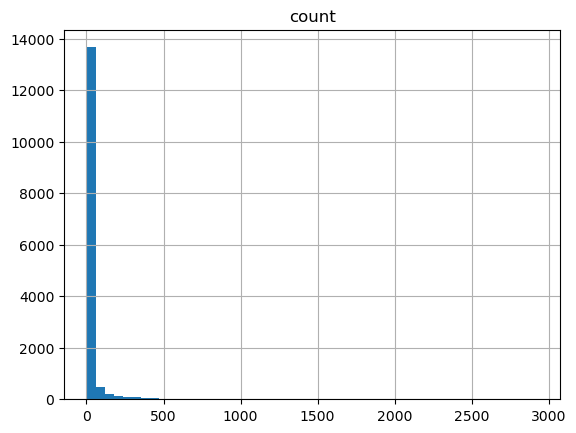

In [229]:
#A visual inspection indicating earlier statistical results, that most beers have a small number of reviews, over 17,500 in fact
rec_beer.hist(column='count', bins=50);

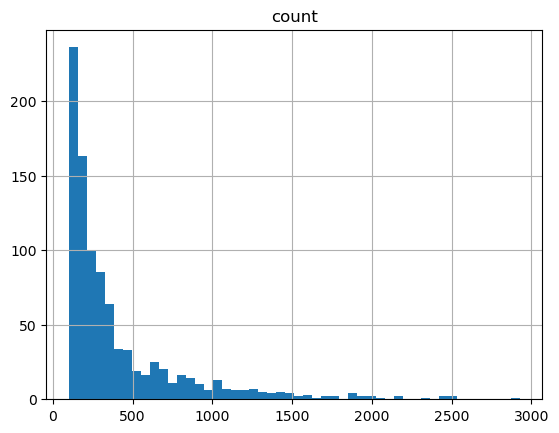

In [231]:
#Another look at the count/frequency of beers where there were at least 100 reviews
rec_beer[rec_beer['count'] > 100].hist(column='count', bins=50);

In [233]:
#A look at the ratings where there were at least 100 reviews
rec_beer[rec_beer['count'] > 100]

,mean,count
beer_beerId,,
56082,4.626016,246
36316,4.625806,155
16814,4.617381,443
47658,4.590615,618
6368,4.483254,627
...,...,...
1341,2.583333,438
837,2.571745,1129
111,2.358444,604


In [235]:
#Get the beer names from the beer IDs determined from the top 3 highest average ratings
df.loc[df.beer_beerId.isin([56082, 36316, 16814]), ['beer_beerId', 'beer_name']].drop_duplicates()

,beer_beerId,beer_name
29464,16814,Heady Topper
125903,36316,Cantillon Blåbær Lambik
322128,56082,Citra DIPA


<BR>

### 5. Which beer style seems to be the favourite based on the reviews written by users? How does written reviews compare to overall review score for the beer style?

The beer style `Quadrupel (Quad)` is the favorite based on the written reviews. The correlation between written reviews and the overall review scores is not super strong. This could be the case as users could leave a high overall rating while writing a review that is deemed more neutral or less positve as determined by the NLP model.

In [237]:
#Import NLP sentiment anlyzer model
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import download

In [239]:
#Load in scored list of words the analyzer uses
download('vader_lexicon', quiet=True)

True

In [241]:
#Instantiate analyzer
sid = SentimentIntensityAnalyzer()

In [243]:
#Sentiment analysis of text reviews
df['review_sentiment'] = df['review_text'].apply(lambda x: sid.polarity_scores(str(x))["compound"])

In [245]:
#Calculate average sentiment review score by beer style and sort values in descending order
df.groupby('beer_style')['review_sentiment'].mean().sort_values(ascending=False)

beer_style
Quadrupel (Quad)             0.857239
Dortmunder / Export Lager    0.855037
Roggenbier                   0.850721
Braggot                      0.850453
Flanders Red Ale             0.850092
                               ...   
Happoshu                     0.533456
American Malt Liquor         0.525800
Japanese Rice Lager          0.516728
Light Lager                  0.469831
Low Alcohol Beer             0.396340
Name: review_sentiment, Length: 104, dtype: float64

In [247]:
#Correlation between text review and overall review score is not as strong
df.loc[df.beer_style == 'Quadrupel (Quad)', ['review_overall', 'review_sentiment']].corr()

,review_overall,review_sentiment
review_overall,1.0000,0.2594
review_sentiment,0.2594,1.0000
